In [11]:
from util import *
from rbm import RestrictedBoltzmannMachine 
from dbn import DeepBeliefNet
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
image_size = [28,28]
train_imgs,train_lbls,test_imgs,test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)



dbn = DeepBeliefNet(sizes={"vis":image_size[0]*image_size[1], "hid":500, "pen":500, "top":2000, "lbl":10},
                        image_size=image_size,
                        n_labels=10,
                        batch_size=10
    )


In [20]:
# greedy layer-wise training 
dbn.train_greedylayerwise(vis_trainset=train_imgs, lbl_trainset=train_lbls, n_iterations=10)

loaded rbm[vis--hid] from trained_rbm
loaded rbm[hid--pen] from trained_rbm
loaded rbm[pen+lbl--top] from trained_rbm


accuracy = 19.00% nb_gibbs= 1
accuracy = 16.00% nb_gibbs= 2
accuracy = 19.00% nb_gibbs= 4
accuracy = 16.00% nb_gibbs= 8
accuracy = 24.00% nb_gibbs= 10
accuracy = 35.00% nb_gibbs= 20
accuracy = 47.00% nb_gibbs= 40
accuracy = 67.00% nb_gibbs= 80
accuracy = 69.00% nb_gibbs= 100
accuracy = 84.00% nb_gibbs= 200
accuracy = 83.00% nb_gibbs= 300
accuracy = 86.00% nb_gibbs= 400


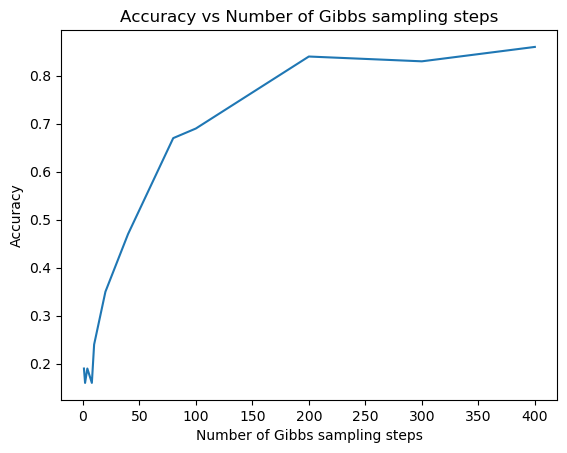

In [17]:
list_gibbs =[1,2,4,8,10,20,40,80,100,200,300,400]
short_train = test_imgs[0:100]
short_lbls = test_lbls[0:100]
accuracy = []
for i in range(len(list_gibbs)):
    accuracy.append(dbn.recognize(short_train,short_lbls, nb_gibbs_recog=list_gibbs[i]))

plt.plot(list_gibbs,accuracy)
plt.xlabel('Number of Gibbs sampling steps')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Gibbs sampling steps')
plt.savefig('Accuracy_vs_Gibbs.png')
plt.show()
